In [1]:
# Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
get.cwd()

NameError: name 'get' is not defined

In [4]:
getcwd()
dataset_fldr = os.path.join(cwd,'archive')
os.listdir(dataset_fldr)
train_path = os.path.join(dataset_fldr,'train.csv')
test_path = os.path.join(dataset_fldr,'test.csv')

In [5]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [7]:
train.shape

(103904, 25)

In [8]:
test.shape

(25976, 25)

In [9]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
# Feature subset selection mainly concerned to the airline satisfaction
X_train = train.iloc[:,8:-3]
X_test = test.iloc[:,8:-3]
print(X_train.shape)
print(X_test.shape)
X_train.head()

(103904, 14)
(25976, 14)


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [11]:
train_target = train.iloc[:,-1:]
print(train_target.shape)
np.unique(train_target.values,return_counts=True)

(103904, 1)


(array(['neutral or dissatisfied', 'satisfied'], dtype=object),
 array([58879, 45025]))

In [ ]:
## Zero Centering dataset

In [13]:
x = X_train.values
x_mean = np.mean(x,axis = 0)
x_n = x - np.matrix(x_mean)
x_n = x_n.T # convert row vector to column vector
print(x_n.shape)
# we are concerned with 14 features

(14, 103904)


In [14]:
C1 = np.cov(x_n)
C2 = np.corrcoef(x_n) ## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))

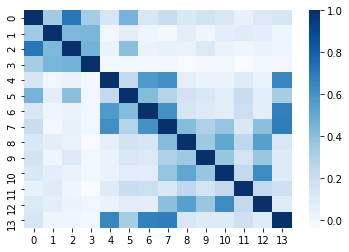

In [15]:
# visual representation of correlation on heatmap
ax = sns.heatmap(C2,cmap = 'Blues')

In [ ]:
# Extract the eigen vectors and eigen values

In [16]:
eig_val,eig_vec = np.linalg.eig(C1)
# sorting the eigvalues indescending order
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

In [17]:
print(eig_val)

[6.52815927 4.47255915 3.43215579 1.98504987 1.61162741 1.18057993
 1.02652179 0.87877104 0.32742411 0.75170941 0.57857082 0.47242866
 0.51571787 0.51339277]


In [19]:
eig_val_ls =[]
eig_vec_ls =[]

In [20]:
# Considering 3 
imp_vec = arg_sort[:3]
for i in imp_vec:
    eig_vec_ls.append(eig_vec[:,i])
    eig_val_ls.append(eig_val[i])
print(eig_val_ls)
print(eig_vec_ls)

[6.528159273595749, 4.472559148142888, 3.432155786676283]
[array([-0.27033179, -0.15491373, -0.21598175, -0.09124768, -0.32248111,
       -0.31012556, -0.35572388, -0.42488029, -0.24281505, -0.20346816,
       -0.20154101, -0.16263595, -0.20267719, -0.36360393]), array([-0.39021937, -0.49052653, -0.51498574, -0.37850549,  0.20260897,
       -0.09688795,  0.1994409 ,  0.22052189,  0.06650134,  0.02366476,
        0.04491473,  0.04552343,  0.04930291,  0.2197468 ]), array([-0.05306717,  0.00824977, -0.07508455, -0.06404967, -0.31940211,
       -0.14576517, -0.27020783, -0.0037756 ,  0.4376789 ,  0.36397705,
        0.42392401,  0.16410797,  0.43174682, -0.27201769])]


In [22]:
## Calculating V
eig_val_arr = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
print(lambda_1)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)
print(V)

[[6.52815927 0.         0.        ]
 [0.         4.47255915 0.        ]
 [0.         0.         3.43215579]]
[[-0.69070483 -0.82525254 -0.09831266]
 [-0.39580866 -1.03738639  0.01528359]
 [-0.55183905 -1.08911378 -0.13910223]
 [-0.23314023 -0.80047953 -0.11865892]
 [-0.8239477   0.42848608 -0.59172685]
 [-0.79237896 -0.20490276 -0.27004569]
 [-0.90888385  0.42178611 -0.50058914]
 [-1.08558032  0.46636909 -0.00699471]
 [-0.62039882  0.14063987  0.81084737]
 [-0.5198665   0.05004723  0.67430674]
 [-0.51494257  0.09498759  0.78536494]
 [-0.41553912  0.09627489  0.30402772]
 [-0.51784555  0.1042679   0.79985753]
 [-0.9290176   0.46472989 -0.50394211]]


In [23]:
## Calculating sigma square i = 0,1,....13 and S
var_ls = []
x_var = np.var(x_n,axis=1)
x_var = np.ravel(x_var)
print(x_var.shape)
print(x_var)
for i in range (V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)
print(S)

(14,)
[1.76311414 2.32583197 1.95698483 1.63229974 1.76764022 1.82115689
 1.73997514 1.77684714 1.65984098 1.73079886 1.39451944 1.60121119
 1.38217027 1.72204345]
[[-12.66976007   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.         -10.93926195   0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.         -10.07504049   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.          -8.88968099   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          -8.04513873
    0.           0.           0.           0.           0.
    0.           0

In [24]:
##Dimensionality reduction transformation
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)
print(W)

(3, 14)
[[-0.10580392 -0.06063097 -0.08453211 -0.03571301 -0.1262144  -0.12137862
  -0.13922513 -0.16629195 -0.09503427 -0.07963447 -0.07888021 -0.06365334
  -0.0793249  -0.14230927]
 [-0.18451462 -0.2319447  -0.2435102  -0.17897573  0.09580334 -0.04581331
   0.09430532  0.10427343  0.03144506  0.01118984  0.02123786  0.02152568
   0.0233128   0.10390693]
 [-0.02864458  0.00445306 -0.04052911 -0.03457271 -0.17240676 -0.07868107
  -0.14585269 -0.00203799  0.23625016  0.1964674   0.22882555  0.08858214
   0.23304814 -0.14682961]]


In [26]:
Z=W@x_n
Z1 = Z.T
Z1.shape

(103904, 3)